<a href="https://colab.research.google.com/github/muthonioprah/knn-naive_bayes/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Prediction**
RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City.

*source: Wikipedia*


Create a model that predicts survival rates on the Titanic based on certain features

## **Metric for success:**
A model with an accuracy level greater than 85%

Dataset Link: https://archive.org/download/train5_202002/train%20%285%29.csv


In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np

## 1st Dataset

In [ ]:
#reads the dataset
tr = pd.read_csv("https://archive.org/download/train5_202002/train%20%285%29.csv")

In [ ]:
#shows first 5 rows
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#number of columns and rows
tr.shape

(891, 12)

In [ ]:
#datatypes
tr.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# descriptive statistics
tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#null values
tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#duplicated values
tr.duplicated().sum()

0

## 2nd Dataset

In [ ]:
#read datasets
tt = pd.read_csv("https://archive.org/download/test1_202002/test%20%281%29.csv")

In [ ]:
#preview columns
tt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#number of rows and columns
tt.shape

(418, 11)

In [ ]:
#datatypes
tt.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#descriptive analytics
tt.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#dataset info
tt.info

<bound method DataFrame.info of      PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]>

In [ ]:
#total null values
tt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## **Cleaning**

In [ ]:
#libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset1

In [ ]:
#showing columns
coll= tr.columns
print(coll)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#cheecking unique values
for i in coll:
  print(i , 'unique : ')
  print(tr[i].unique())

PassengerId unique : 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 

duplicates dropped

In [ ]:
#627/891 rows are null in cabin column
tr1= tr.drop('Cabin', axis = 1)

In [ ]:
#dropping null values in embarked col
tr1 =tr1.dropna(subset=['Embarked'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


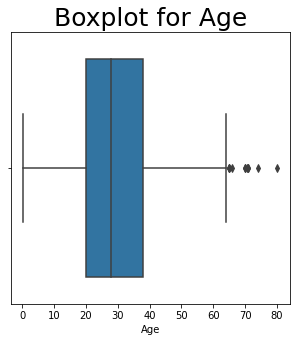

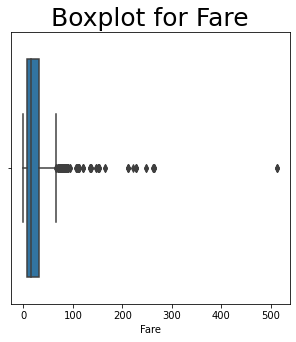

In [ ]:
#check for outliers in cols
num = ['Age', 'Fare']
for i in num:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(tr[i])
    plt.title('Boxplot for ' + i, size = 25, color = 'black')
            
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


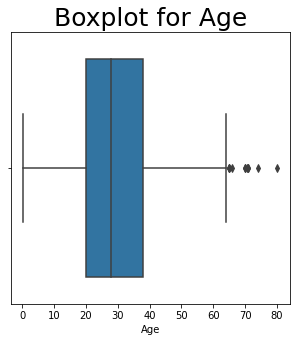

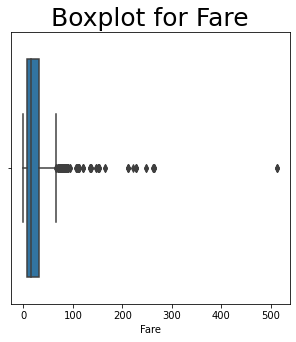

In [ ]:
#check for outliers in cols
num = ['Age', 'Fare']
for i in num:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(tr[i])
    plt.title('Boxplot for ' + i, size = 25, color = 'black')
            
plt.show()

Age values are more concentrated in the middle, fare values are more skewed to the left

In [ ]:
#check for changes
tr1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Changes applied, no null values in train dataset

## Dataset2

In [ ]:
#names of columns
colz = tt.columns
print(colz)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#cheecking unique values
for i in colz:
  print(i , 'unique : ')
  print(tr[i].unique())

PassengerId unique : 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


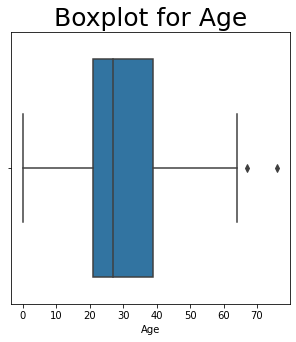

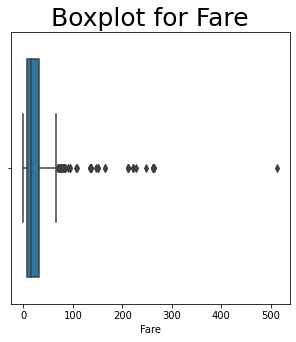

In [ ]:
#check for outliers in cols
num1 = ['Age', 'Fare']
for i in num1:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(tt[i])
    plt.title('Boxplot for ' + i, size = 25, color = 'black')
            
plt.show()

In [ ]:
#327/418 rows are null in cabin column
tt1= tt.drop('Cabin', axis = 1)

In [ ]:
#fill missing  age values with median since most values in that columnb are concentrated on the middle
tt1['Age'].fillna(tt1['Age'].median(), inplace = True)


In [ ]:
#dropping null values in fare col
tt1 =tt1.dropna(subset=['Fare'])

In [ ]:
#check for changes
tt1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **Exploratory Data Analysis**



# **Univariate Analysis**

## Dataset1

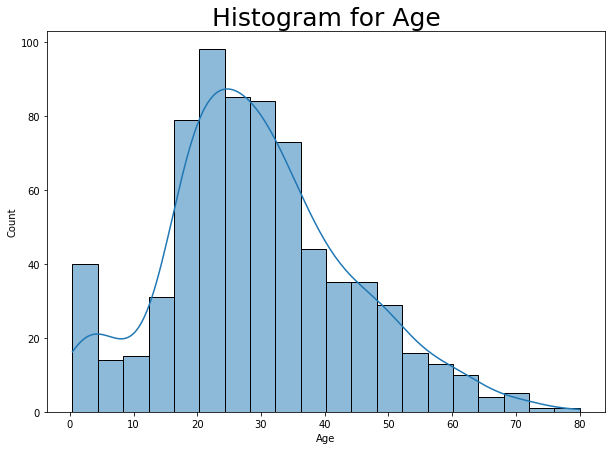

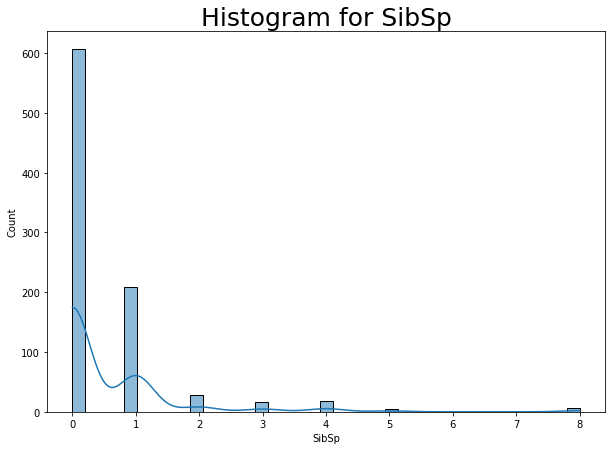

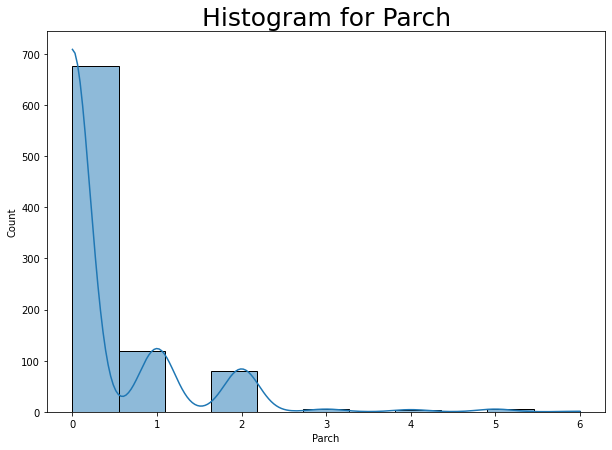

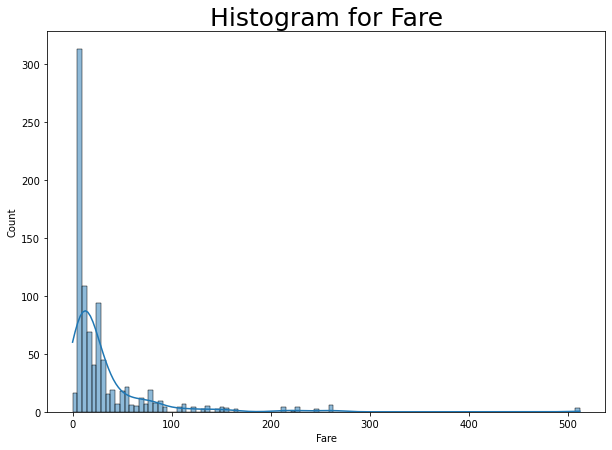

In [ ]:
#Histogram of the numerical columns
col1 = ['Age', 'SibSp','Parch', 'Fare']
for i in col1:
    plt.figure(figsize = (10,7))
    sns.histplot(tr1[i], kde = True)
    plt.title('Histogram for ' + i, size = 25, color = 'black')
            
plt.show()

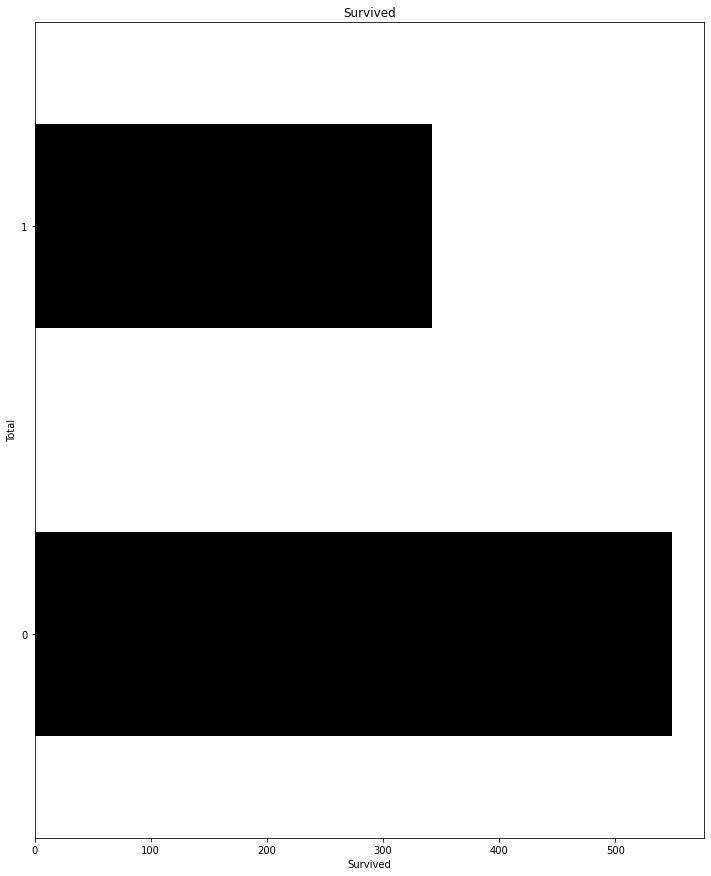

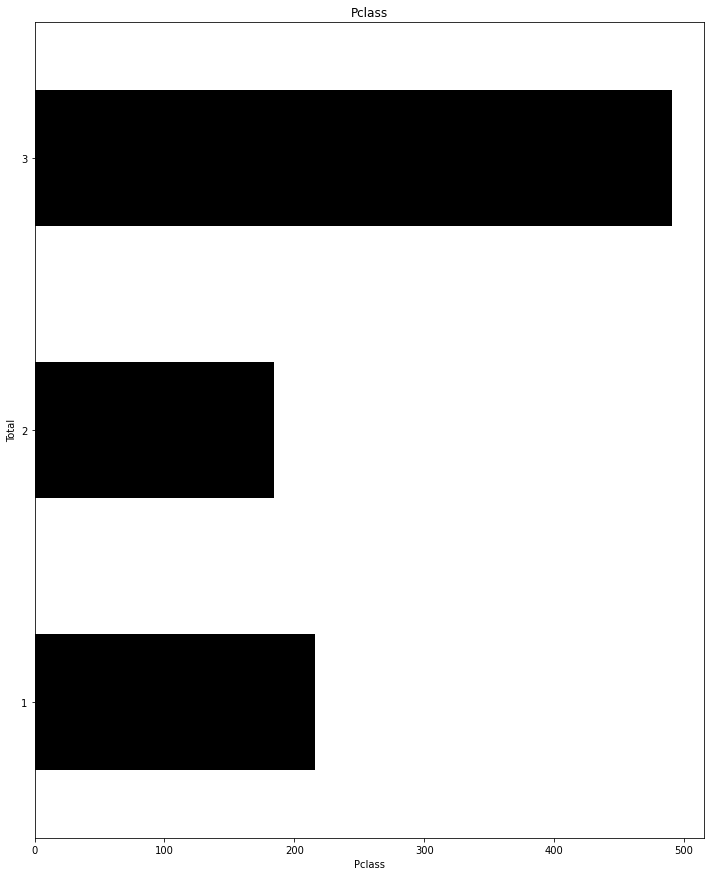

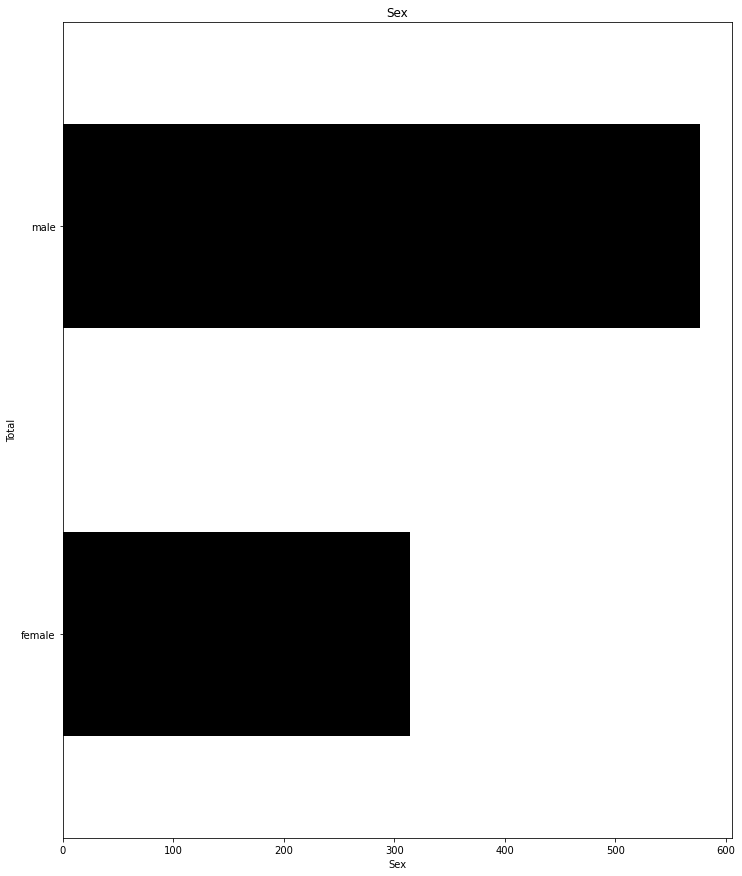

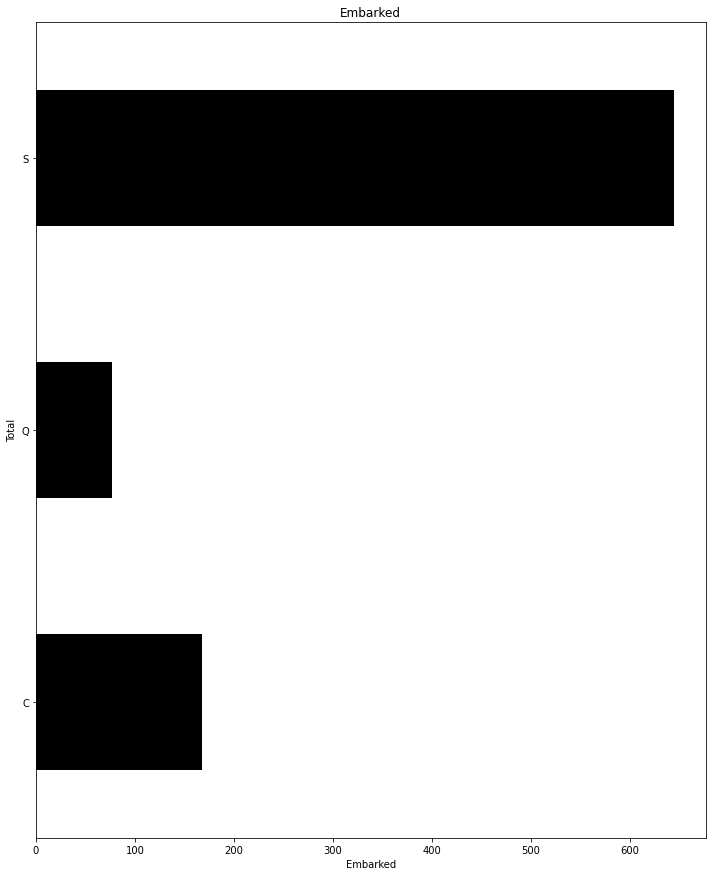

In [ ]:
# Bar charts on non numerical variables
con = ['Survived', 'Pclass', 'Sex', 'Embarked']
for i in con:
  plt.figure(figsize = (12,15))
  tr.groupby(i).size().plot(kind='barh', color= 'black')
  plt.title(i)
  plt.ylabel('Total')
  plt.xlabel(i)
  plt.show()

In [ ]:
coly =['Survived', 'Pclass', 'Age', 'Fare']
for i in coly:
  print(i, 'mean:', tr1[i].mean())

Survived mean: 0.38245219347581555
Pclass mean: 2.3115860517435323
Age mean: 29.64209269662921
Fare mean: 32.09668087739029


In [ ]:
for i in coly:
  print(i, 'mode:',tr1[i].mode())

Survived mode: 0    0
dtype: int64
Pclass mode: 0    3
dtype: int64
Age mode: 0    24.0
dtype: float64
Fare mode: 0    8.05
dtype: float64


In [ ]:
for i in coly:
  print(i, 'median:',tr1[i].median())

Survived median: 0.0
Pclass median: 3.0
Age median: 28.0
Fare median: 14.4542


In [ ]:
for i in coly:
  print(i, 'Standard Deviation:',tr1[i].std())

Survived Standard Deviation: 0.48625968831477473
Pclass Standard Deviation: 0.8346997785705771
Age Standard Deviation: 14.49293290032352
Fare Standard Deviation: 49.69750431670801


In [ ]:
for i in coly:
  print(i, 'Variance:',tr1[i].var())

Survived Variance: 0.23644848447998187
Pclass Variance: 0.6967237203457705
Age Variance: 210.04510405327994
Fare Variance: 2469.8419353092113


In [ ]:
for i in coly:
  print(i, 'Skewness:',tr1[i].skew())

Survived Skewness: 0.4845676297760328
Pclass Skewness: -0.6369977585999191
Age Skewness: 0.3888806178753708
Fare Skewness: 4.801440211044194


In [ ]:
for i in coly:
  print(i, 'Kurtosis:',tr1[i].kurt())

Survived Kurtosis: -1.7691794454365986
Pclass Kurtosis: -1.2694374832322646
Age Kurtosis: 0.1879487930331507
Fare Kurtosis: 33.508477269700144


## Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

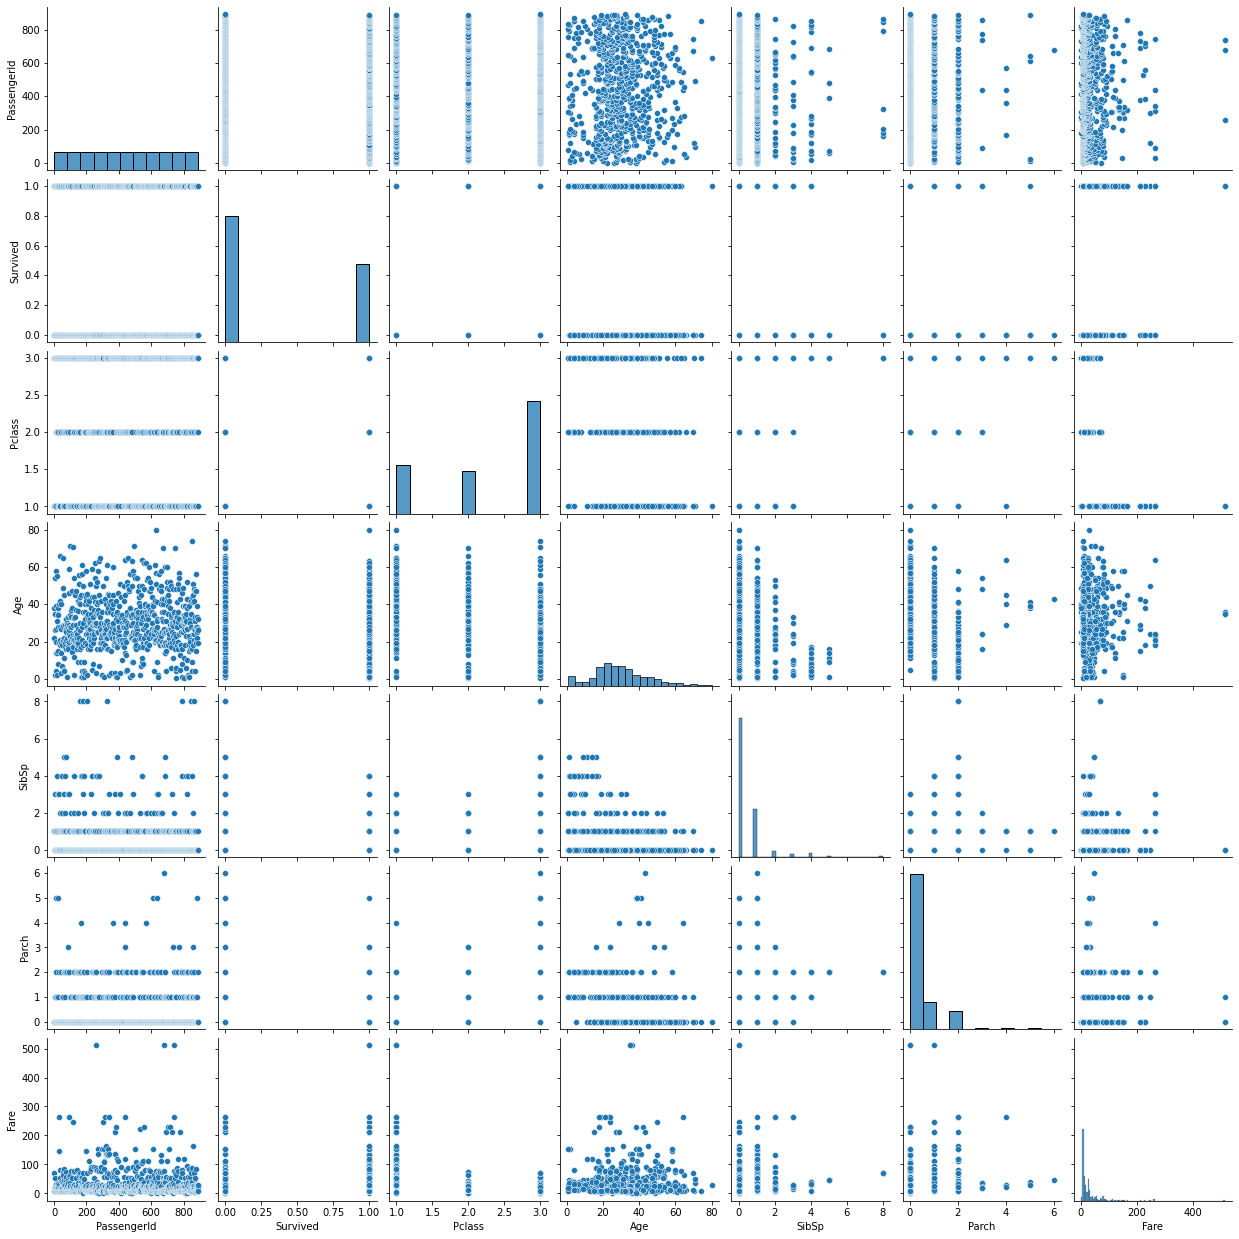

In [ ]:
#Pairplot showing the relationship between the various columns
plt.figure(figsize = (20, 20), dpi=100)
sns.pairplot(tr1)


Most Survivors were female, in 1st class, travelled without family  and
were below 37 years

MultiVariate Analysis

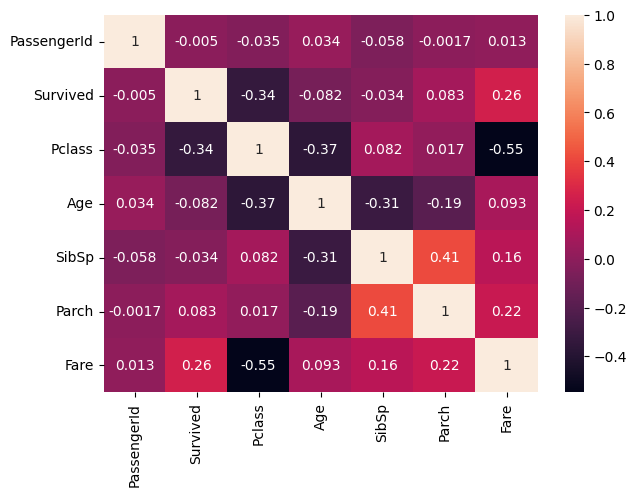

In [ ]:
#Correlation
correlation = tr1.corr()
fig, ax = plt.subplots(figsize=(7,5), dpi = 100)
sns.heatmap(correlation, annot=True)

The Fare amount and Survival rate have  a high correlation

 The Spouses Aboard and Number of parents have a high correlation


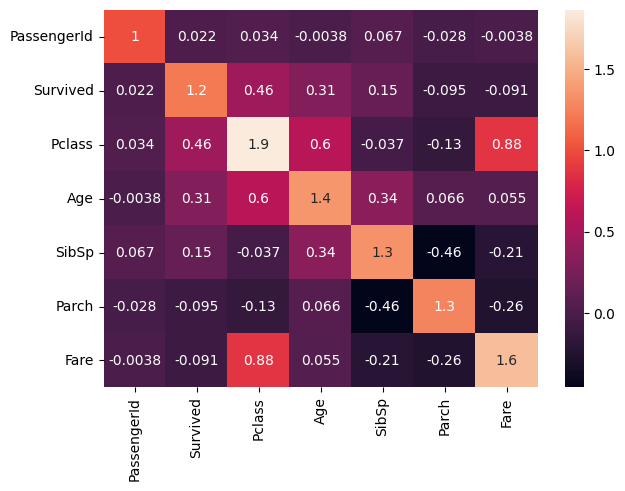

In [ ]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)

# This is calculated using linear algebra inverse function
plt.figure(dpi = 100, figsize = (7,5))
sns.heatmap(pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns), annot = True)

Passenger class and fare have high multicolinearity




## **Modelling**

In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
#label encoding columns
tr2 = tr1.apply(LabelEncoder().fit_transform)
tr2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,522,18,2
1,1,1,0,190,0,51,1,0,595,207,0
2,2,1,2,353,0,34,0,0,668,41,2
3,3,1,0,272,0,47,1,0,48,189,2
4,4,0,2,15,1,47,0,0,471,43,2


In [ ]:
#splitting data to independent and dependent variables

X = tr2[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values

y = tr2['Survived'].values

80-20 split

In [ ]:
#splitting to train and test 80-20

X_train,X_test, y_train,y_test= train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
#normalising the data
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training our model 
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#predictions
y_pred = knn.predict(X_test)

In [ ]:
# Evaluation 
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[84 21]
 [26 47]]
Accuracy: 0.7359550561797753


Model accuracy is 73%

In [ ]:
# Performing Hyperparameter Tuning 
k_range = range(1, 51)
param_grid = dict(n_neighbors=k_range)

#parameter range
grid = GridSearchCV(knn, param_grid, cv=10)

#fitting the model
grid_search = grid.fit(X_train, y_train)
print('Best Params', grid_search.best_estimator_.get_params())

Best Params {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [ ]:
#prediction using the tuned values
knn_tuned = KNeighborsClassifier(metric= 'minkowski', n_jobs= None, n_neighbors= 9, p= 2, weights= 'uniform')
knn_tuned.fit(X_train, y_train)
y_pred_1 = knn_tuned.predict(X_test)
# Evaluation 
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_1))

[[84 21]
 [26 47]]
Accuracy: 0.7471910112359551


There was a slight improvement after hyperparameter tuning

70-30 split

In [ ]:
#splitting to train and test 70-30

X_train1,X_test1, y_train1, y_test1= train_test_split(X,y, test_size = 0.3, random_state=0)

In [ ]:
#normalising the data
sc = StandardScaler()
sc.fit(X_train1)

X_train1 = sc.transform(X_train1)
X_test1 = sc.transform(X_test1)

In [ ]:
# Training our model 
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#predictions
y_pred1 = knn.predict(X_test1)

In [ ]:
# Evaluation 
print(confusion_matrix(y_test1, y_pred1))
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

[[136  21]
 [ 34  76]]
Accuracy: 0.7940074906367042


In [ ]:
# Performing Hyperparameter Tuning 
k_range = range(1, 51)
param_grid = dict(n_neighbors=k_range)

#parameter range
grid = GridSearchCV(knn, param_grid, cv=10)

#fitting the model
grid_search1 = grid.fit(X_train1, y_train1)
print('Best Params', grid_search.best_estimator_.get_params())

Best Params {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [ ]:
#prediction using the tuned values
knn_tuned1 = KNeighborsClassifier(metric= 'minkowski', n_jobs= None, n_neighbors= 9, p= 2, weights= 'uniform')
knn_tuned1.fit(X_train1, y_train1)
y_pred_2 = knn_tuned1.predict(X_test1)
# Evaluation 
print(confusion_matrix(y_test1, y_pred_2))
print("Accuracy:", metrics.accuracy_score(y_test1, y_pred_2))

[[137  20]
 [ 38  72]]
Accuracy: 0.7827715355805244


Hyper parameter did not improve the models accuracy

60-40 split

In [ ]:
#splitting to train and test 70-30

X_train2, X_test2, y_train2, y_test2= train_test_split(X,y, test_size = 0.4, random_state=0)

In [ ]:
#normalising the data
sc = StandardScaler()
sc.fit(X_train1)

X_train2 = sc.transform(X_train2)
X_test2 = sc.transform(X_test2)

In [ ]:
# Training our model 
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#predictions
y_pred2 = knn.predict(X_test2)

In [ ]:
# Evaluation 
print(confusion_matrix(y_test2, y_pred2))
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

[[125  32]
 [ 53  57]]
Accuracy: 0.6816479400749064


In [ ]:
# Performing Hyperparameter Tuning 
k_range = range(1, 51)
param_grid = dict(n_neighbors=k_range)

#parameter range
grid = GridSearchCV(knn, param_grid, cv=10)

#fitting the model
grid_search2 = grid.fit(X_train2, y_train2)
print('Best Params', grid_search.best_estimator_.get_params())

Best Params {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [ ]:
#prediction using the tuned values
knn_tuned2 = KNeighborsClassifier(metric= 'minkowski', n_jobs= None, n_neighbors= 9, p= 2, weights= 'uniform')
knn_tuned2.fit(X_train2, y_train2)
y_pred_3 = knn_tuned2.predict(X_test2)
# Evaluation 
print(confusion_matrix(y_test2, y_pred_3))
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred_3))

[[135  22]
 [ 58  52]]
Accuracy: 0.700374531835206


Hyperparameter tuning slightly improved the model

## **Challenging the solution**


In [ ]:
#challenging the solution by using a different classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Train using 80% of the data.
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2, random_state=1)
# Create a Random Forest classifier
forest = RandomForestClassifier()
# Train the Random Forest model 
forest.fit(X_train_forest, y_train_forest)
# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test_forest)
# Check for Model Accuracy
metrics.accuracy_score(y_test_forest, y_pred_forest)

0.8033707865168539

Random Forest Classifier performs better than the K Nearest Neighbours

# **Conclusion**

The 80-20 split had a 73% accuracy, which improved to 74% after hyperparameter tunning

The 70-30 split had a 79% accuracy, which improved to 78% after hyperparameter tunning

The 60-40 split had a 68% accuracy, which improved to 70% after hyperparameter tunning

A different classifier model, Random Forests had a higher accuracy of 80%

# **Recommendation**

If kNN is to be used as the model, a 70-30 split is recommended for use since it has a higher accuracy level than all other splits

However, Random Forests had a higher accuracy of 80%